In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [3]:
!pip install xgboost imbalanced-learn

In [4]:
!pip install optuna catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df1 = pd.read_csv('/content/drive/MyDrive/big_data_set1_f.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/big_data_set2_f.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/big_data_set3_f.csv', encoding='cp949')

print("df1 head:")
display(df1.head())

print("\ndf2 head:")
display(df2.head())

print("\ndf3 head:")
display(df3.head())

df1 head:


,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN



df2 head:


,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN,RC_M1_SAA,RC_M1_TO_UE_CT,RC_M1_UE_CUS_CN,RC_M1_AV_NP_AT,APV_CE_RAT,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6



df3 head:


,ENCODED_MCT,TA_YM,M12_MAL_1020_RAT,M12_MAL_30_RAT,M12_MAL_40_RAT,M12_MAL_50_RAT,M12_MAL_60_RAT,M12_FME_1020_RAT,M12_FME_30_RAT,M12_FME_40_RAT,M12_FME_50_RAT,M12_FME_60_RAT,MCT_UE_CLN_REU_RAT,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT
0,0305234DDB,202311,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,-999999.9,-999999.9,-999999.9
1,0495B069FF,202403,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,25.0,0.0,0.0,100.0
2,0495B069FF,202405,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
3,0495B069FF,202406,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
4,055EDDDD01,202410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9


In [7]:
# 첫 번째 데이터셋 칼럼명 매핑
column_mapping_1 = {
    'ENCODED_MCT': '가맹점구분번호',
    'MCT_BSE_AR': '가맹점주소',
    'GDS_AF_MCT_AR': '가맹점주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '브랜드구분코드',
    'MCT_SIGUNGU_NM': '가맹점지역',
    'HPSN_MCT_ZCD_NM': '업종',
    'HPSN_MCT_BZN_CD_NM': '상권',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일'
}

# 두 번째 데이터셋 칼럼명 매핑
column_mapping_2 = {
    'ENCODED_MCT': '가맹점구분번호',
    'TA_YM': '기준년월',
    'MCT_OPE_MS_CN': '가맹점운영개월수구간',
    'RC_M1_SAA': '매출금액구간',
    'RC_M1_TO_UE_CT': '매출건수구간',
    'RC_M1_UE_CUS_CN': '유니크고객수구간',
    'RC_M1_AV_NP_AT': '객단가구간',
    'APV_CE_RAT': '취소율구간',
    'DLV_SAA_RAT': '배달매출금액비율',
    'M1_SME_RY_SAA_RAT': '동일업종매출금액비율',
    'M1_SME_RY_CNT_RAT': '동일업종매출건수비율',
    'M12_SME_RY_SAA_PCE_RT': '동일업종내매출순위비율',
    'M12_SME_BZN_SAA_PCE_RT': '동일상권내매출순위비율',
    'M12_SME_RY_ME_MCT_RAT': '동일업종내해지가맹점비중',
    'M12_SME_BZN_ME_MCT_RAT': '동일상권내해지가맹점비중'
}

# 세 번째 데이터셋 칼럼명 매핑
column_mapping_3 = {
    'ENCODED_MCT': '가맹점구분번호',
    'TA_YM': '기준년월',
    'M12_MAL_1020_RAT': '남성20대이하고객비중',
    'M12_MAL_30_RAT': '남성30대고객비중',
    'M12_MAL_40_RAT': '남성40대고객비중',
    'M12_MAL_50_RAT': '남성50대고객비중',
    'M12_MAL_60_RAT': '남성60대이상고객비중',
    'M12_FME_1020_RAT': '여성20대이하고객비중',
    'M12_FME_30_RAT': '여성30대고객비중',
    'M12_FME_40_RAT': '여성40대고객비중',
    'M12_FME_50_RAT': '여성50대고객비중',
    'M12_FME_60_RAT': '여성60대이상고객비중',
    'MCT_UE_CLN_REU_RAT': '재방문고객비중',
    'MCT_UE_CLN_NEW_RAT': '신규고객비중',
    'RC_M1_SHC_RSD_UE_CLN_RAT': '거주이용고객비율',
    'RC_M1_SHC_WP_UE_CLN_RAT': '직장이용고객비율',
    'RC_M1_SHC_FLP_UE_CLN_RAT': '유동인구이용고객비율'
}

# 각 데이터프레임 칼럼명 변경
df1.rename(columns=column_mapping_1, inplace=True)
df2.rename(columns=column_mapping_2, inplace=True)
df3.rename(columns=column_mapping_3, inplace=True)

In [8]:
df1.head()

,가맹점구분번호,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN


In [9]:
df2.head()

,가맹점구분번호,기준년월,가맹점운영개월수구간,매출금액구간,매출건수구간,유니크고객수구간,객단가구간,취소율구간,배달매출금액비율,동일업종매출금액비율,동일업종매출건수비율,동일업종내매출순위비율,동일상권내매출순위비율,동일업종내해지가맹점비중,동일상권내해지가맹점비중
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6


In [10]:
df3.head()

,가맹점구분번호,기준년월,남성20대이하고객비중,남성30대고객비중,남성40대고객비중,남성50대고객비중,남성60대이상고객비중,여성20대이하고객비중,여성30대고객비중,여성40대고객비중,여성50대고객비중,여성60대이상고객비중,재방문고객비중,신규고객비중,거주이용고객비율,직장이용고객비율,유동인구이용고객비율
0,0305234DDB,202311,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.0,-999999.9,-999999.9,-999999.9
1,0495B069FF,202403,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,25.0,0.0,0.0,100.0
2,0495B069FF,202405,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
3,0495B069FF,202406,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9
4,055EDDDD01,202410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,33.33,0.0,-999999.9,-999999.9,-999999.9


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       3138 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       86590 non-null  object 
 1   기준년월          86590 non-null  int64  
 2   가맹점운영개월수구간    86590 non-null  object 
 3   매출금액구간        86590 non-null  object 
 4   매출건수구간        86590 non-null  object 
 5   유니크고객수구간      86590 non-null  object 
 6   객단가구간         86590 non-null  object 
 7   취소율구간         79958 non-null  object 
 8   배달매출금액비율      86590 non-null  float64
 9   동일업종매출금액비율    86590 non-null  float64
 10  동일업종매출건수비율    86590 non-null  float64
 11  동일업종내매출순위비율   86590 non-null  float64
 12  동일상권내매출순위비율   86590 non-null  float64
 13  동일업종내해지가맹점비중  86590 non-null  float64
 14  동일상권내해지가맹점비중  86590 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 9.9+ MB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가맹점구분번호      86590 non-null  object 
 1   기준년월         86590 non-null  int64  
 2   남성20대이하고객비중  86590 non-null  float64
 3   남성30대고객비중    86590 non-null  float64
 4   남성40대고객비중    86590 non-null  float64
 5   남성50대고객비중    86590 non-null  float64
 6   남성60대이상고객비중  86590 non-null  float64
 7   여성20대이하고객비중  86590 non-null  float64
 8   여성30대고객비중    86590 non-null  float64
 9   여성40대고객비중    86590 non-null  float64
 10  여성50대고객비중    86590 non-null  float64
 11  여성60대이상고객비중  86590 non-null  float64
 12  재방문고객비중      86590 non-null  float64
 13  신규고객비중       86590 non-null  float64
 14  거주이용고객비율     86590 non-null  float64
 15  직장이용고객비율     86590 non-null  float64
 16  유동인구이용고객비율   86590 non-null  float64
dtypes: float64(15), int64(1), object(1)
memory usage: 11.2+ MB


In [14]:
# df2와 df3를 '가맹점구분번호'와 '기준년월'을 기준으로 inner join
merged_df2_df3_monthly = pd.merge(df2, df3, on=['가맹점구분번호', '기준년월'], how='inner')

# merged_df2_df3_monthly에 df1을 '가맹점구분번호'를 기준으로 left join
# 이렇게 하면 df2와 df3의 월별 데이터는 모두 유지되고, df1의 정보가 추가
merged_df_final = pd.merge(merged_df2_df3_monthly, df1, on='가맹점구분번호', how='left')

print("\n병합된 데이터프레임 정보:")
merged_df_final.info()


병합된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       86590 non-null  object 
 1   기준년월          86590 non-null  int64  
 2   가맹점운영개월수구간    86590 non-null  object 
 3   매출금액구간        86590 non-null  object 
 4   매출건수구간        86590 non-null  object 
 5   유니크고객수구간      86590 non-null  object 
 6   객단가구간         86590 non-null  object 
 7   취소율구간         79958 non-null  object 
 8   배달매출금액비율      86590 non-null  float64
 9   동일업종매출금액비율    86590 non-null  float64
 10  동일업종매출건수비율    86590 non-null  float64
 11  동일업종내매출순위비율   86590 non-null  float64
 12  동일상권내매출순위비율   86590 non-null  float64
 13  동일업종내해지가맹점비중  86590 non-null  float64
 14  동일상권내해지가맹점비중  86590 non-null  float64
 15  남성20대이하고객비중   86590 non-null  float64
 16  남성30대고객비중     86590 non-null  float64
 17  남성40대고객비중     86590 non-null  float64
 18  남성50대고객비중 

In [15]:
# merged_df_left 데이터프레임을 CSV 파일로 저장
merged_df_final.to_csv('merged_df_final.csv', index=False, encoding='cp949')

In [16]:
merged_df_final.isnull().sum()

,0
가맹점구분번호,0
기준년월,0
가맹점운영개월수구간,0
매출금액구간,0
매출건수구간,0
유니크고객수구간,0
객단가구간,0
취소율구간,6632
배달매출금액비율,0
동일업종매출금액비율,0


In [17]:
# 결측치가 있는 칼럼 확인
cols_with_missing = merged_df_final.columns[merged_df_final.isnull().any()].tolist()

print(f"결측치가 있는 칼럼: {cols_with_missing}")

# 결측치가 있는 칼럼 제외 (단, 폐업일은 종속변수 생성에 필요하므로 제외하지 않음)
cols_to_drop = [col for col in cols_with_missing if col != '폐업일']

merged_df_processed = merged_df_final.drop(columns=cols_to_drop)

# 1. 종속 변수 생성: '폐업일' 컬럼의 결측치 여부로 폐업 여부 (1: 폐업, 0: 유지)를 나타내는 종속 변수 생성
merged_df_processed['폐업여부'] = merged_df_processed['폐업일'].apply(lambda x: 1 if pd.notnull(x) else 0)

결측치가 있는 칼럼: ['취소율구간', '브랜드구분코드', '상권', '폐업일']


# 모델 학습

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 준비
# df_raw = merged_df_processed.copy() # 이전 셀에서 데이터를 가져온다고 가정
df = merged_df_processed.sort_values('기준년월').drop_duplicates('가맹점구분번호', keep='first').copy()

# 2. 데이터 전처리
# '가맹점주소' 간소화
df['가맹점주소'] = df['가맹점주소'].str.replace(r'\d+(?=가길|\w*길)', '', regex=True)
df['가맹점주소'] = df['가맹점주소'].str.replace(r'\s+\d+(-\d+)?$', '', regex=True)
df['가맹점주소'] = df['가맹점주소'].str.replace(r'\s+[\d\-\.]+$', '', regex=True)
df['가맹점주소'] = df['가맹점주소'].str.replace(r'\d+.*$', '', regex=True).str.strip()
print("주소 전처리 완료")

# 주소 정규화
df['가맹점주소'] = df['가맹점주소'].str.replace('서울특별시', '서울', regex=False)
df['가맹점주소'] = df['가맹점주소'].str.replace(r'\s+', ' ', regex=True).str.strip()
for _ in range(3):
    df['가맹점주소'] = df['가맹점주소'].str.replace(r'(로|길|동|가|나|다|라|마|번|지하)$', '', regex=True).str.strip()

# '운영개월수' 파생변수 생성
df['개설일_dt'] = pd.to_datetime(df['개설일'], format='%Y%m%d')
df['기준년월_dt'] = pd.to_datetime(df['기준년월'], format='%Y%m')
df['폐업일_dt'] = pd.to_datetime(df['폐업일'], format='%Y%m%d', errors='coerce')

df['운영개월수'] = np.where(
    df['폐업일'].notna(),
    (df['폐업일_dt'] - df['개설일_dt']).dt.days / 30.44,
    (df['기준년월_dt'] - df['개설일_dt']).dt.days / 30.44
)
print("'운영개월수' 생성 완료")

# 3. 독립변수(X)와 종속변수(y) 설정
X = df[['가맹점주소', '업종', '운영개월수']]
y = df['폐업여부']

# 데이터 분할 전에 전체 X 데이터에 라벨 인코딩 적용
categorical_features = ['가맹점주소', '업종']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    # 전체 데이터로 학습 및 변환
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
print("라벨 인코딩 완료")

# 4. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- 데이터 분할 결과 ---")
print(f"학습 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")

# 5. SMOTE 오버샘플링 (훈련 데이터에만 적용)
print("\n--- SMOTE 적용 전 훈련 데이터 분포 ---")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("\n--- SMOTE 적용 후 훈련 데이터 분포 ---")
print(y_train_over.value_counts())

주소 전처리 완료
'운영개월수' 생성 완료
라벨 인코딩 완료

--- 데이터 분할 결과 ---
학습 세트 크기: (3348, 3)
테스트 세트 크기: (837, 3)

--- SMOTE 적용 전 훈련 데이터 분포 ---
폐업여부
0    3246
1     102
Name: count, dtype: int64

--- SMOTE 적용 후 훈련 데이터 분포 ---
폐업여부
0    3246
1    3246
Name: count, dtype: int64


In [19]:
df['가맹점주소'].unique()

array(['서울 성동구 왕십리', '서울 성동구 성수이', '서울 성동구 독서당', '서울 성동구 무학봉',
       '서울 성동구 금호', '서울 성동구 마장', '서울 성동구 마조', '서울 성동구 성덕정', '서울 성동구 용답중앙',
       '서울 성동구 아차산', '서울 성동구 서울숲', '서울 성동구 송정', '서울 성동구 금호산', '서울 성동구 사근',
       '서울 성동구 성수', '서울 성동구 행당', '서울 성동구 동호', '서울 성동구 고산자', '서울 성동구 무학',
       '서울 성동구 무수막', '서울 성동구 상원', '서울 성동구 연무장', '서울 성동구 한림말',
       '서울 성동구 청계천', '서울 성동구 둘레', '서울 성동구 장터', '서울 성동구 살곶이', '서울 성동구 광나루',
       '서울 성동구 성수일', '서울 성동구 용답', '서울 성동구 왕십리광장', '서울 성동구 천호대',
       '서울 성동구 동일', '서울 성동구 옥수', '서울 성동구 자동차시장', '서울 성동구 홍익', '서울 성동구 뚝섬',
       '서울 성동구 매봉', '서울 성동구 하왕십리', '서울 성동구 상왕십리', '서울 성동구 응봉',
       '서울 성동구 난계', '서울 성동구 도선', '경기 동두천시 중앙', '서울 강남구 선릉'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4185 entries, 29236 to 46233
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   가맹점구분번호       4185 non-null   object        
 1   기준년월          4185 non-null   int64         
 2   가맹점운영개월수구간    4185 non-null   object        
 3   매출금액구간        4185 non-null   object        
 4   매출건수구간        4185 non-null   object        
 5   유니크고객수구간      4185 non-null   object        
 6   객단가구간         4185 non-null   object        
 7   배달매출금액비율      4185 non-null   float64       
 8   동일업종매출금액비율    4185 non-null   float64       
 9   동일업종매출건수비율    4185 non-null   float64       
 10  동일업종내매출순위비율   4185 non-null   float64       
 11  동일상권내매출순위비율   4185 non-null   float64       
 12  동일업종내해지가맹점비중  4185 non-null   float64       
 13  동일상권내해지가맹점비중  4185 non-null   float64       
 14  남성20대이하고객비중   4185 non-null   float64       
 15  남성30대고객비중     4185 non-null   float64 

In [21]:
import xgboost as xgb

# XGBoost 분류 모델 초기화 및 학습
# objective='binary:logistic'는 이진 분류를 위한 설정.
# eval_metric='logloss'는 학습 중 평가 지표로 logloss를 사용
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
# 테스트 세트에 대한 확률 예측
# predict_proba()는 각 클래스에 대한 확률을 반환
# 이진 분류의 경우, 두 번째 열([:, 1])이 긍정 클래스(폐업)에 대한 확률
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost 모델 확률 예측 완료. (상위 10개 예측 확률값):")
print(y_pred_proba_xgb[:10])


XGBoost 모델 확률 예측 완료. (상위 10개 예측 확률값):
[0.00142024 0.02226542 0.0013238  0.0057323  0.00055109 0.00036026
 0.00502512 0.00161246 0.08313879 0.06146655]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 모델 평가
print("--- XGBoost 모델 평가 결과 ---")

# 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"정확도 (Accuracy): {accuracy:.4f}")

# 정밀도 (Precision) - 폐업으로 예측한 것 중 실제 폐업 비율
precision = precision_score(y_test, y_pred_xgb)
print(f"정밀도 (Precision): {precision:.4f}")

# 재현율 (Recall) - 실제 폐업 중 모델이 폐업으로 예측한 비율 (민감도)
recall = recall_score(y_test, y_pred_xgb)
print(f"재현율 (Recall): {recall:.4f}")

# F1-score - 정밀도와 재현율의 조화평균
f1 = f1_score(y_test, y_pred_xgb)
print(f"F1-score: {f1:.4f}")

# ROC AUC - 분류 모델의 성능을 나타내는 대표적인 지표 (확률값 필요)
# y_pred_proba_xgb는 긍정 클래스(폐업, 1)에 대한 확률
auc = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC: {auc:.4f}")

# 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_xgb)
print("\n혼동 행렬 (Confusion Matrix):")
print(cm)

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

--- XGBoost 모델 평가 결과 ---
정확도 (Accuracy): 0.9665
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-score: 0.0000
ROC AUC: 0.7435

혼동 행렬 (Confusion Matrix):
[[809   3]
 [ 25   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       812
           1       0.00      0.00      0.00        25

    accuracy                           0.97       837
   macro avg       0.49      0.50      0.49       837
weighted avg       0.94      0.97      0.95       837



In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier

# 2. RandomForest 모델
print("\n2. RandomForest 모델 학습 중...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("✓ RandomForest 학습 완료")

# 3. CatBoost 모델
print("\n3. CatBoost 모델 학습 중...")
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)
cat_model.fit(X_train, y_train)
print("✓ CatBoost 학습 완료")

# 4. Voting Ensemble (Soft Voting)
print("\n4. 앙상블 모델 생성 중...")
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('cat', cat_model)
    ],
    voting='soft',
    weights=[1, 1, 1]
)
ensemble_model.fit(X_train, y_train)
print("✓ 앙상블 모델 생성 완료")


2. RandomForest 모델 학습 중...
✓ RandomForest 학습 완료

3. CatBoost 모델 학습 중...
✓ CatBoost 학습 완료

4. 앙상블 모델 생성 중...
✓ 앙상블 모델 생성 완료


# Oputna

In [25]:
# 개별 모델 평가
print("\n" + "=" * 50)
print("개별 모델 성능 평가")
print("=" * 50)

models = {
    'XGBoost': xgb_model,
    'RandomForest': rf_model,
    'CatBoost': cat_model,
    'Ensemble': ensemble_model
}

results = {}

for name, model in models.items():
    print(f"\n【{name}】")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc
    }

    print(f"정확도 (Accuracy): {acc:.4f}")
    print(f"정밀도 (Precision): {prec:.4f}")
    print(f"재현율 (Recall): {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")


개별 모델 성능 평가

【XGBoost】
정확도 (Accuracy): 0.9665
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-score: 0.0000
ROC AUC: 0.7435

【RandomForest】
정확도 (Accuracy): 0.9701
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-score: 0.0000
ROC AUC: 0.7636

【CatBoost】
정확도 (Accuracy): 0.9701
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-score: 0.0000
ROC AUC: 0.7758

【Ensemble】
정확도 (Accuracy): 0.9701
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-score: 0.0000
ROC AUC: 0.7681


In [26]:
import optuna
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import xgboost as xgb
import numpy as np

def objective(trial):
    """
    재현율과 F1-score를 우선적으로 최적화하는 목적 함수
    """
    # 임계값 탐색 추가 (재현율 향상을 위해)
    threshold = trial.suggest_float('threshold', 0.01, 0.5)

    # XGBoost: 클래스 불균형 대응 파라미터 추가
    scale_pos_weight = len(y_train_over[y_train_over == 0]) / len(y_train_over[y_train_over == 1])
    xgb_params = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
        'scale_pos_weight': trial.suggest_float('xgb_scale_pos_weight', 1, scale_pos_weight),
        'gamma': trial.suggest_float('xgb_gamma', 0, 5),  # 과적합 방지
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # RandomForest: 클래스 가중치 추가
    class_weight_option = trial.suggest_categorical('rf_class_weight', ['balanced', 'balanced_subsample', None])
    rf_params = {
        'n_estimators': trial.suggest_int('rf_n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('rf_max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 5),  # 추가
        'class_weight': class_weight_option,
        'random_state': 42,
        'n_jobs': -1
    }

    # CatBoost: 클래스 가중치 추가
    cat_params = {
        'iterations': trial.suggest_int('cat_iterations', 100, 1000),
        'learning_rate': trial.suggest_float('cat_learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('cat_depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('cat_l2_leaf_reg', 1, 10),  # 정규화
        'auto_class_weights': trial.suggest_categorical('cat_auto_class_weights', ['Balanced', 'SqrtBalanced', None]),
        'random_state': 42,
        'verbose': False
    }

    # 앙상블 가중치
    weights = [
        trial.suggest_float('weight_xgb', 0.1, 1.0),
        trial.suggest_float('weight_rf', 0.1, 1.0),
        trial.suggest_float('weight_cat', 0.1, 1.0)
    ]

    # 모델 생성
    xgb_model = xgb.XGBClassifier(**xgb_params)
    rf_model = RandomForestClassifier(**rf_params)
    cat_model = CatBoostClassifier(**cat_params)

    ensemble_model = VotingClassifier(
        estimators=[('xgb', xgb_model), ('rf', rf_model), ('cat', cat_model)],
        voting='soft',
        weights=weights
    )

    # 학습
    ensemble_model.fit(X_train_over, y_train_over)

    # 예측 확률 계산
    y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]

    # 임계값 적용하여 예측
    y_pred = (y_pred_proba >= threshold).astype(int)

    # 여러 지표 계산
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_pred_proba)

    # 최적화 목표: 재현율 우선, F1-score 보조
    # 재현율 60% 이상을 목표로 하되, F1-score도 고려
    if recall < 0.6:
        # 재현율이 60% 미만이면 페널티
        score = recall * 0.7 + f1 * 0.3 - 0.2
    else:
        # 재현율이 60% 이상이면 F1-score에 더 가중치
        score = recall * 0.4 + f1 * 0.6

    # 선택적: AUC도 함께 고려하려면
    # score = recall * 0.4 + f1 * 0.3 + auc * 0.3

    return score

# Optuna Study 생성 (최대화)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))

# 최적화 실행 (시행 횟수 증가 권장)
study.optimize(objective, n_trials=50, show_progress_bar=True)

# 결과 출력
print("\n=== Optuna 최적화 완료 ===")
print(f"최적 점수: {study.best_value:.4f}")
print(f"\n최적 하이퍼파라미터:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# 최종 모델 학습 및 평가
best_params = study.best_params
threshold = best_params.pop('threshold')

# 파라미터 분리
final_xgb_params = {k.replace('xgb_', ''): v for k, v in best_params.items() if k.startswith('xgb_')}
final_rf_params = {k.replace('rf_', ''): v for k, v in best_params.items() if k.startswith('rf_')}
final_cat_params = {k.replace('cat_', ''): v for k, v in best_params.items() if k.startswith('cat_')}
final_weights = [best_params['weight_xgb'], best_params['weight_rf'], best_params['weight_cat']]

# 최종 모델
final_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **final_xgb_params)
final_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **final_rf_params)
final_cat = CatBoostClassifier(random_state=42, verbose=False, **final_cat_params)

final_ensemble = VotingClassifier(
    estimators=[('xgb', final_xgb), ('rf', final_rf), ('cat', final_cat)],
    voting='soft',
    weights=final_weights
)

# 학습
final_ensemble.fit(X_train_over, y_train_over)

# 최적 임계값으로 예측
y_pred_proba_final = final_ensemble.predict_proba(X_test)[:, 1]
y_pred_final = (y_pred_proba_final >= threshold).astype(int)

# 평가
from sklearn.metrics import classification_report, confusion_matrix

print(f"\n=== 최종 모델 평가 (임계값: {threshold:.4f}) ===")
print(classification_report(y_test, y_pred_final))
print("\n혼동 행렬:")
print(confusion_matrix(y_test, y_pred_final))
print(f"\nROC AUC: {roc_auc_score(y_test, y_pred_proba_final):.4f}")

[I 2025-10-19 02:50:04,705] A new study created in memory with name: no-name-da2a0cd4-f6c1-420f-a83e-2dfe59f458db


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-19 02:50:07,008] Trial 0 finished with value: 0.3664657534246576 and parameters: {'threshold': 0.19352465823520762, 'xgb_n_estimators': 956, 'xgb_max_depth': 8, 'xgb_learning_rate': 0.18361096041714062, 'xgb_subsample': 0.6624074561769746, 'xgb_colsample_bytree': 0.662397808134481, 'xgb_scale_pos_weight': 1.0, 'xgb_gamma': 0.2904180608409973, 'rf_class_weight': 'balanced', 'rf_n_estimators': 118, 'rf_max_depth': 10, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 2, 'cat_iterations': 263, 'cat_learning_rate': 0.06318730785749581, 'cat_depth': 5, 'cat_l2_leaf_reg': 5.72280788469014, 'cat_auto_class_weights': None, 'weight_xgb': 0.22554447458683766, 'weight_rf': 0.3629301836816964, 'weight_cat': 0.4297256589643226}. Best is trial 0 with value: 0.3664657534246576.
[I 2025-10-19 02:50:17,444] Trial 1 finished with value: 0.346695652173913 and parameters: {'threshold': 0.2334742922663476, 'xgb_n_estimators': 807, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.15912798713994736, 'xg

In [27]:
# 전체 데이터셋 (X)에 대한 확률 예측
# predict_proba()는 각 클래스에 대한 확률을 반환
# 이진 분류의 경우, 두 번째 열([:, 1])이 긍정 클래스(폐업)에 대한 확률
y_pred_proba_all = xgb_model.predict_proba(X)[:, 1]

# 예측 결과와 ID 매핑
prob_df = pd.DataFrame({
    '가맹점구분번호': df['가맹점구분번호'],
    '폐업확률': y_pred_proba_all
})

# 원본 데이터에 확률 merge
merged_df_processed = pd.merge(merged_df_processed, prob_df, on='가맹점구분번호', how='left')

# 결과 확인
print("\n'폐업확률' 칼럼 추가 확인 (상위 10개 행):")
display(merged_df_processed[['가맹점구분번호', '기준년월', '폐업여부', '폐업확률']].head(10))


'폐업확률' 칼럼 추가 확인 (상위 10개 행):


,가맹점구분번호,기준년월,폐업여부,폐업확률
0,000F03E44A,202404,0,0.005945
1,000F03E44A,202312,0,0.005945
2,002816BA73,202404,0,0.005109
3,002816BA73,202411,0,0.005109
4,002816BA73,202406,0,0.005109
5,002816BA73,202305,0,0.005109
6,003473B465,202401,0,0.013992
7,003AC99735,202311,0,0.014684
8,003AC99735,202304,0,0.014684
9,003AC99735,202411,0,0.014684


In [28]:
# merged_df_left 데이터프레임을 CSV 파일로 저장
merged_df_processed.to_csv('merged_df_prob.csv', index=False, encoding='cp949')

In [29]:
from google.colab import drive
import os

merged_df_processed.to_csv('/content/drive/MyDrive/merged_df_prob.csv', index=False, encoding='cp949')

In [30]:
print("\n상세 정보:")
closure_counts = merged_df_processed['폐업여부'].value_counts()
total = len(merged_df_processed)
print(f"전체 데이터: {total:,}개")
print(f"영업중(0): {closure_counts[0]:,}개 ({closure_counts[0]/total*100:.2f}%)")
print(f"폐업(1): {closure_counts[1]:,}개 ({closure_counts[1]/total*100:.2f}%)")


상세 정보:
전체 데이터: 86,590개
영업중(0): 84,256개 (97.30%)
폐업(1): 2,334개 (2.70%)


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

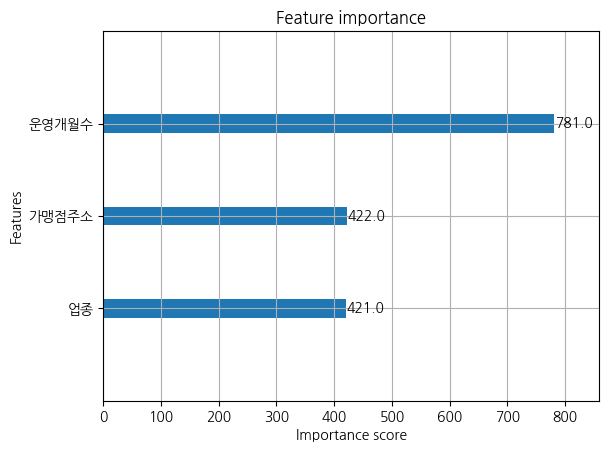

In [31]:
import warnings
import matplotlib.pyplot as plt
import matplotlib

# 모든 matplotlib 경고 무시
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 추가적인 경고 메시지 비활성화
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# Feature Importance 확인
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.show()

In [32]:
print(f"고유 가맹점 수: {merged_df_processed['가맹점구분번호'].nunique()}")

고유 가맹점 수: 4185


# 모델 저장하기

In [33]:
import pickle
import os

# 최종 앙상블 모델 평가
y_pred_final = final_ensemble.predict(X_test)
y_pred_proba_final = final_ensemble.predict_proba(X_test)[:, 1]

print("\n--- 최종 앙상블 모델 평가 결과 (Optuna 적용) ---")
print(classification_report(y_test, y_pred_final))

# 평가 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {auc:.4f}")

# 라벨 인코더 생성
categorical_features = ['가맹점주소', '업종']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    le.fit(df[col])  # df는 원본 데이터프레임
    label_encoders[col] = le

# 모델 패키지 생성
model_package = {
    'model': final_ensemble,  # Optuna로 튜닝된 앙상블 모델
    'label_encoders': label_encoders,
    'feature_cols': ['가맹점주소', '업종', '운영개월수'],
    'categorical_cols': ['가맹점주소', '업종'],
    'best_params': study.best_params,  # Optuna 최적 파라미터 저장
    'model_info': {
        'name': 'Optuna 튜닝 앙상블 모델 (XGBoost + RandomForest + CatBoost)',
        'version': '2.0.0',
        'accuracy': float(accuracy),
        'precision': float(precision),
        'recall': float(recall),
        'f1_score': float(f1),
        'roc_auc': float(auc),
        'note': 'VotingClassifier 앙상블 + Optuna 하이퍼파라미터 튜닝',
        'models': ['XGBoost', 'RandomForest', 'CatBoost'],
        'voting': 'soft',
        'weights': final_weights
    }
}

# 모델 저장
with open('model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("\n✓ 모델 저장 완료!")
print(f"  - 모델: VotingClassifier (XGBoost + RandomForest + CatBoost)")
print(f"  - 가중치: {final_weights}")
print(f"  - ROC AUC: {auc:.4f}")
print(f"  - 파일 크기: {os.path.getsize('model.pkl') / (1024*1024):.2f} MB")

# 저장된 모델 테스트
print("\n" + "=" * 80)
print("저장된 모델 테스트")
print("=" * 80)

with open('model.pkl', 'rb') as f:
    test_package = pickle.load(f)

print("✓ 모델 로드 성공!")
print(f"  - 키: {list(test_package.keys())}")
print(f"  - 특징: {test_package['feature_cols']}")
print(f"  - 최적 파라미터 개수: {len(test_package['best_params'])}")

# 간단한 예측 테스트
test_X = X_test.iloc[0:1]
test_prob = test_package['model'].predict_proba(test_X)[0][1]
print(f"\n테스트 예측 확률: {test_prob * 100:.2f}%")

# 다운로드
from google.colab import files
files.download('model.pkl')

print("\n✓ 다운로드 완료! backend/model.pkl로 교체하세요.")


--- 최종 앙상블 모델 평가 결과 (Optuna 적용) ---
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       812
           1       0.05      0.16      0.08        25

    accuracy                           0.89       837
   macro avg       0.51      0.54      0.51       837
weighted avg       0.94      0.89      0.91       837


정확도: 0.8877
정밀도: 0.0519
재현율: 0.1600
F1-score: 0.0784
ROC AUC: 0.7402

✓ 모델 저장 완료!
  - 모델: VotingClassifier (XGBoost + RandomForest + CatBoost)
  - 가중치: [0.44158106926895213, 0.10706111796013998, 0.953846088441905]
  - ROC AUC: 0.7402
  - 파일 크기: 7.99 MB

저장된 모델 테스트
✓ 모델 로드 성공!
  - 키: ['model', 'label_encoders', 'feature_cols', 'categorical_cols', 'best_params', 'model_info']
  - 특징: ['가맹점주소', '업종', '운영개월수']
  - 최적 파라미터 개수: 21

테스트 예측 확률: 7.06%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ 다운로드 완료! backend/model.pkl로 교체하세요.
